# COVID DATASET

#Un data set pequeño para analizar los casos de Covid de cada uno de los paises registrados. La info registra los casos hasta 
el 29 abril 2020

##### Analizaremos esto con Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Covid-Dataset.csv')

In [10]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


#### Pequeña exploracion de los datos

In [4]:
df.shape

(321, 6)

In [8]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [9]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

#### Graficaremos alguno de los atributos para tomar dimension

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
sns.set()

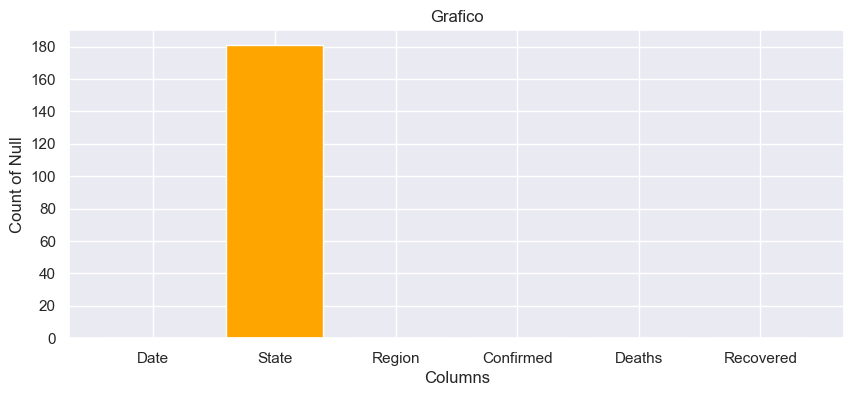

In [34]:
plt.figure(figsize=(10,4))
plt.bar(df.columns,df.isnull().sum(),color='orange')
plt.xlabel("Columns")
plt.ylabel("Count of Null")
plt.title("Grafico")
plt.yticks(range(0,200,20))
plt.show()

#### Cuantos casos Confirmados,Muertos y recuperados tenemos por region

In [64]:
df[['Confirmed','Deaths','Recovered','Region']].groupby(['Region']).sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [67]:
pd.DataFrame(df.groupby(['Region']).sum()).sort_values(by=['Confirmed'],ascending=False)

C:\Users\fedev\AppData\Local\Temp\ipykernel_18900\2917752153.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(df.groupby(['Region']).sum()).sort_values(by=['Confirmed'],ascending=False)


,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,120720
Spain,236899,24275,132929
Italy,203591,27682,71252
France,166543,24121,49118
UK,166441,26166,857
...,...,...,...
Sao Tome and Principe,8,0,4
Papua New Guinea,8,0,0
Bhutan,7,0,5


#### Remover todos los registros donde los casos Confirmed sean menos a 10

In [78]:
df[df['Confirmed']<10].count()

Date         0
State        0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [77]:
df=df[df['Confirmed']>10]

In [80]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


### En cual region tenemos la maxima cantidad de registros confirmados

In [88]:
df.groupby(['Region']).Confirmed.sum().idxmax()

'US'

In [93]:
df.groupby(['Region']).Confirmed.sum().sort_values(ascending=False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

### En cual region tenemos la minima cantidad de registros de muertes

In [98]:
df.groupby(['Region']).Deaths.sum().idxmin()

'Cambodia'

In [104]:
df.groupby(['Region']).Deaths.sum().sort_values(ascending=True).head(30)

Region
Fiji                                0
Cambodia                            0
Mozambique                          0
Grenada                             0
South Sudan                         0
Dominica                            0
Seychelles                          0
Mongolia                            0
Nepal                               0
Namibia                             0
Timor-Leste                         0
Saint Vincent and the Grenadines    0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
Laos                                0
Vietnam                             0
Eritrea                             0
Rwanda                              0
Uganda                              0
Macau                               0
Madagascar                          0
Liechtenstein                       1
Eswatini                            1
Botswana                            1
Guinea-Bissau                       1
Maldi

### Cuantos casos fueron confirmados, recuperados y muertos en India

In [108]:
df[df['Region']=='India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


### Ordenar la data por casos confirmados en orden ascendente


In [110]:
df.sort_values(by=['Confirmed'],ascending=True)



,Date,State,Region,Confirmed,Deaths,Recovered
27,4/29/2020,NaN,Burundi,11,1,4
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
144,4/29/2020,NaN,Seychelles,11,0,6
256,4/29/2020,Montserrat,UK,11,1,2
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929
